In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers ,models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [3]:
print(type(X_train), type(y_train))
print(X_train.shape)
print(y_train.shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000, 1)


In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train =y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [75]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    label_index = y[index][0]    
    plt.title(classes[label_index])
    plt.axis('off')




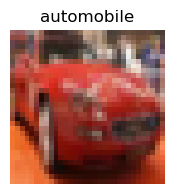

In [77]:
plot_sample(X_train, y_train, 5)


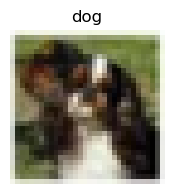

In [79]:
plot_sample(X_train, y_train, 500)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ])

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


ann.fit(X_train, y_train, epochs=5)
    

C:\Users\Dell\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 64ms/step - accuracy: 0.3533 - loss: 1.8121
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.4281 - loss: 1.6226
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.4554 - loss: 1.5403
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.4787 - loss: 1.4807
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 0.4963 - loss: 1.4300


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n',classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.54      0.54      0.54      1000
           1       0.61      0.58      0.59      1000
           2       0.30      0.54      0.39      1000
           3       0.40      0.28      0.32      1000
           4       0.60      0.18      0.28      1000
           5       0.59      0.21      0.31      1000
           6       0.53      0.50      0.52      1000
           7       0.44      0.67      0.53      1000
           8       0.57      0.65      0.60      1000
           9       0.50      0.65      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.46     10000
weighted avg       0.51      0.48      0.46     10000



In [17]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

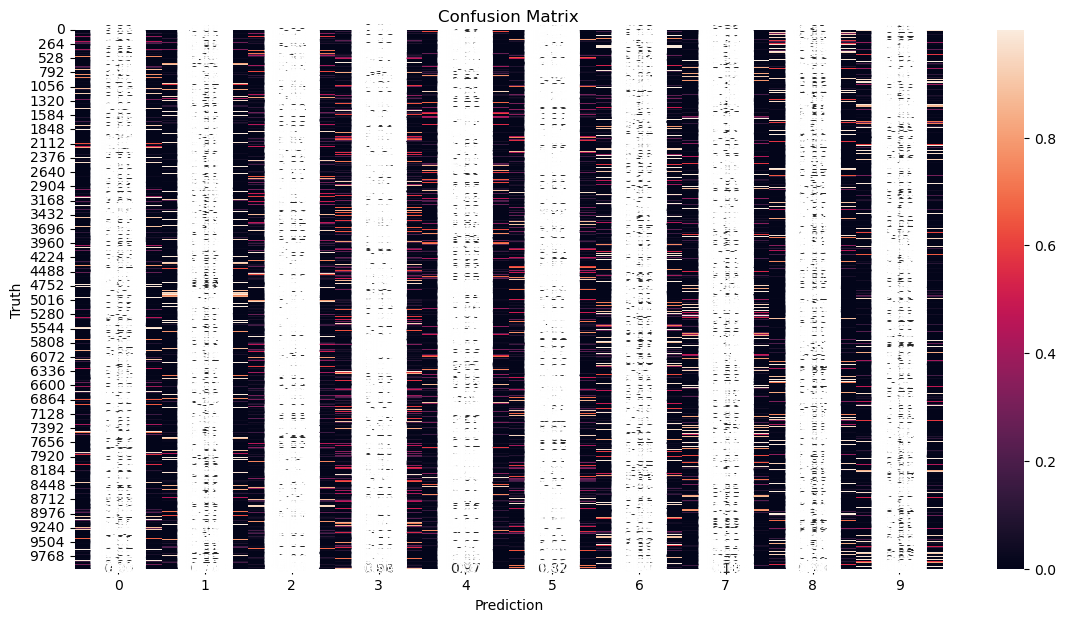

In [46]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show

In [19]:
cnn = models.Sequential([
    layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(32, 32, 3)
),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')

])    
    

C:\Users\Dell\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.4816 - loss: 1.4422
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6188 - loss: 1.0980
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6612 - loss: 0.9751
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6938 - loss: 0.8913
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7151 - loss: 0.8227
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7339 - loss: 0.7676
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7489 - loss: 0.7203
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7630 - loss: 0.6772
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7756 - loss: 0.6447
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7885 - loss: 0.6033


In [22]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7080 - loss: 0.8867


[0.8867377042770386, 0.7080000042915344]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[8.86672526e-04, 7.08402076e-05, 2.83301761e-03, 8.37530792e-01,
        5.66924631e-04, 1.56624809e-01, 5.82660839e-04, 3.02765489e-04,
        5.52001176e-04, 4.95777749e-05],
       [2.09385034e-04, 2.44277179e-01, 5.60755598e-06, 5.01365605e-07,
        3.74220793e-10, 2.05554791e-08, 6.33933936e-08, 9.92538718e-10,
        7.45348334e-01, 1.01587810e-02],
       [5.59234954e-02, 1.34074450e-01, 2.23169057e-03, 8.40001367e-03,
        3.79723118e-04, 1.12055510e-03, 3.67556419e-03, 2.12213985e-04,
        7.39053845e-01, 5.49284108e-02],
       [7.54757345e-01, 1.29391486e-02, 7.24356696e-02, 8.58073123e-03,
        2.00078096e-02, 4.10678709e-04, 2.76930223e-04, 4.72443862e-05,
        1.30428717e-01, 1.15790106e-04],
       [1.60913189e-07, 1.01868579e-06, 4.89996234e-03, 1.61822920e-03,
        1.41305961e-02, 4.41656557e-05, 9.79304850e-01, 5.56955342e-07,
        3.63518183e-07, 1.61439800e-07]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [25]:
y_test[:]

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

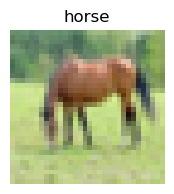

In [81]:
plot_sample(X_test, y_test, 60)

In [83]:
classes[y_classes[6]]

'automobile'

In [85]:
classes[y_classes[50]]

'horse'